# Transformations

[Gelman, Data Analysis using Regression and multilevel hierarchical models, 2007]

In [3]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(arm)

Loading required package: MASS

Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select

Loading required package: Matrix

Attaching package: ‘Matrix’

The following object is masked from ‘package:tidyr’:

    expand

Loading required package: lme4

arm (Version 1.10-1, built: 2018-4-12)

Working directory is /Users/fz/Documents/Curso-Stat/Cursos



In [7]:
# predict weight

mesquite <- read.table("../tablas/ARM_Data/mesquite/mesquite.dat", 
                       header = TRUE, skip = 3)
# Obs Group Diam1 Diam2 TotHt CanHt Dens LeafWt
head(mesquite)

X3,MCD,X2.80,X2.55,X2.16,X0.60,X1,X1179.2
<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
4,MCD,1.3,0.85,1.80,1.20,1,308.0
5,MCD,3.3,1.90,1.55,1.05,1,855.2
6,MCD,1.4,1.40,1.20,1.00,1,268.7
7,MCD,1.5,0.50,1.00,0.90,1,155.5
8,MCD,3.9,2.30,1.70,1.30,2,1253.2
9,MCD,1.8,1.35,0.80,0.60,1,328.0


In [8]:
names(mesquite) <- c("obs", "group", "diam1", "diam2", "total.height", "canopy.height", "density", "leaf.weight")
head(mesquite)

obs,group,diam1,diam2,total.height,canopy.height,density,leaf.weight
<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
4,MCD,1.3,0.85,1.80,1.20,1,308.0
5,MCD,3.3,1.90,1.55,1.05,1,855.2
6,MCD,1.4,1.40,1.20,1.00,1,268.7
7,MCD,1.5,0.50,1.00,0.90,1,155.5
8,MCD,3.9,2.30,1.70,1.30,2,1253.2
9,MCD,1.8,1.35,0.80,0.60,1,328.0


<img src='treeoflife.jpg'>

In [9]:
lm1 <- lm(formula = leaf.weight ~ diam1 + diam2 + canopy.height + 
          total.height + density + group, data = mesquite)

lm1


Call:
lm(formula = leaf.weight ~ diam1 + diam2 + canopy.height + total.height + 
    density + group, data = mesquite)

Coefficients:
  (Intercept)          diam1          diam2  canopy.height   total.height  
      -1069.0          195.0          342.8          796.2         -442.3  
      density       groupMCD  
        138.2          365.5  


In [10]:
# Effects are multiplicative: think about volume.
# Instead of adding +x grams, we think about additional x% in height yields a 0.37x% in weight.

lm2 <- lm(formula = log(leaf.weight) ~ log(diam1) + log(diam2) + log(canopy.height) + 
          log(total.height) + log(density) + group, data = mesquite)

lm2          


Call:
lm(formula = log(leaf.weight) ~ log(diam1) + log(diam2) + log(canopy.height) + 
    log(total.height) + log(density) + group, data = mesquite)

Coefficients:
       (Intercept)          log(diam1)          log(diam2)  log(canopy.height)  
            4.8082              0.3871              1.1436              0.5164  
 log(total.height)        log(density)            groupMCD  
            0.2468              0.1225              0.5732  


In [11]:
mesquite <- mesquite %>% mutate(canopy.volume = diam1*diam2*canopy.height)
head(mesquite)

obs,group,diam1,diam2,total.height,canopy.height,density,leaf.weight,canopy.volume
<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
4,MCD,1.3,0.85,1.80,1.20,1,308.0,1.3260
5,MCD,3.3,1.90,1.55,1.05,1,855.2,6.5835
6,MCD,1.4,1.40,1.20,1.00,1,268.7,1.9600
7,MCD,1.5,0.50,1.00,0.90,1,155.5,0.6750
8,MCD,3.9,2.30,1.70,1.30,2,1253.2,11.6610
9,MCD,1.8,1.35,0.80,0.60,1,328.0,1.4580


In [12]:
lm3 <- lm(formula = log(leaf.weight) ~ log(canopy.volume), data = mesquite)

summary(lm3)


Call:
lm(formula = log(leaf.weight) ~ log(canopy.volume), data = mesquite)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.99948 -0.26569  0.07547  0.31827  0.77778 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         5.14191    0.08220   62.55   <2e-16 ***
log(canopy.volume)  0.71733    0.05306   13.52   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4015 on 41 degrees of freedom
Multiple R-squared:  0.8168,	Adjusted R-squared:  0.8123 
F-statistic: 182.8 on 1 and 41 DF,  p-value: < 2.2e-16


In [13]:
mesquite <- mesquite %>% mutate(canopy.area = diam1*diam2, canopy.shape=diam1/diam2)
head(mesquite)

obs,group,diam1,diam2,total.height,canopy.height,density,leaf.weight,canopy.volume,canopy.area,canopy.shape
<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
4,MCD,1.3,0.85,1.80,1.20,1,308.0,1.3260,1.105,1.529412
5,MCD,3.3,1.90,1.55,1.05,1,855.2,6.5835,6.270,1.736842
6,MCD,1.4,1.40,1.20,1.00,1,268.7,1.9600,1.960,1.000000
7,MCD,1.5,0.50,1.00,0.90,1,155.5,0.6750,0.750,3.000000
8,MCD,3.9,2.30,1.70,1.30,2,1253.2,11.6610,8.970,1.695652
9,MCD,1.8,1.35,0.80,0.60,1,328.0,1.4580,2.430,1.333333


In [14]:
lmFinal <- lm(formula = log(leaf.weight) ~ log(canopy.volume) + log(canopy.area) + 
              log(canopy.shape) + log(total.height) + log(density) + group, data = mesquite)

summary(lmFinal)


Call:
lm(formula = log(leaf.weight) ~ log(canopy.volume) + log(canopy.area) + 
    log(canopy.shape) + log(total.height) + log(density) + group, 
    data = mesquite)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.68006 -0.15176  0.02271  0.15619  0.73036 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          4.8082     0.1880  25.577  < 2e-16 ***
log(canopy.volume)   0.5164     0.4681   1.103 0.277297    
log(canopy.area)     0.2489     0.4870   0.511 0.612343    
log(canopy.shape)   -0.3782     0.2422  -1.561 0.127159    
log(total.height)    0.2468     0.4765   0.518 0.607595    
log(density)         0.1225     0.1275   0.961 0.342962    
groupMCD             0.5732     0.1381   4.150 0.000194 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3401 on 36 degrees of freedom
Multiple R-squared:  0.8846,	Adjusted R-squared:  0.8653 
F-statistic: 45.98 on 6 and 36 DF,  p-value: 1.993

In [15]:
lmGroup <- lm(formula = log(leaf.weight) ~ group, data = mesquite)

summary(lmGroup)

is.factor(mesquite$group)
levels(mesquite$group)


Call:
lm(formula = log(leaf.weight) ~ group, data = mesquite)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.95879 -0.67346  0.01119  0.65314  2.18151 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.1255     0.2033  30.134   <2e-16 ***
groupMCD     -0.4524     0.2779  -1.628    0.111    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9091 on 41 degrees of freedom
Multiple R-squared:  0.06069,	Adjusted R-squared:  0.03778 
F-statistic: 2.649 on 1 and 41 DF,  p-value: 0.1113


[1] TRUE

[1] "ALS" "MCD"

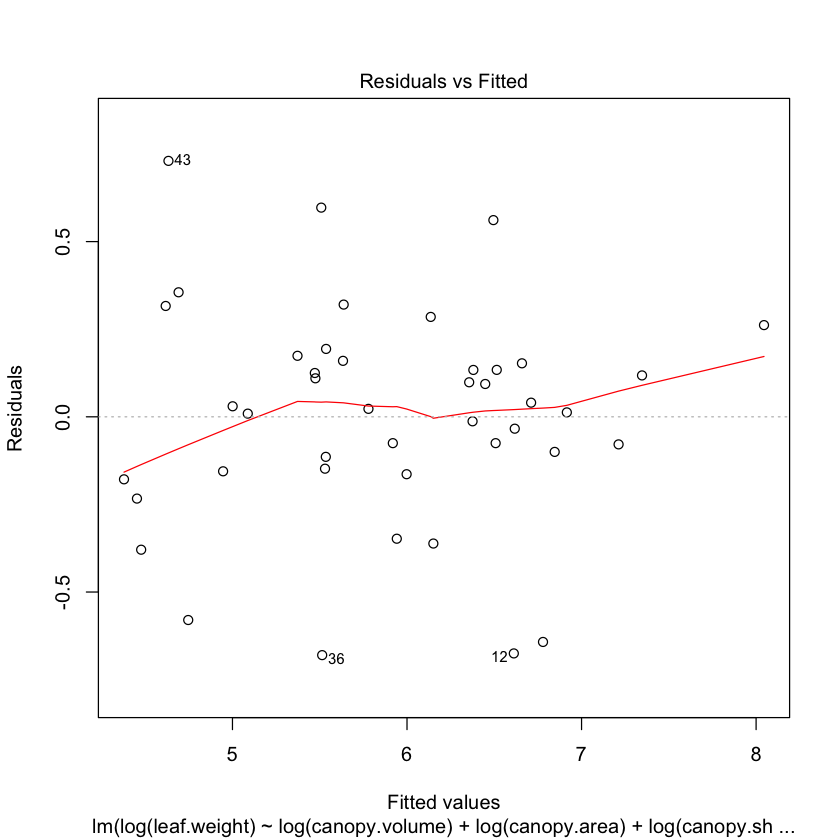

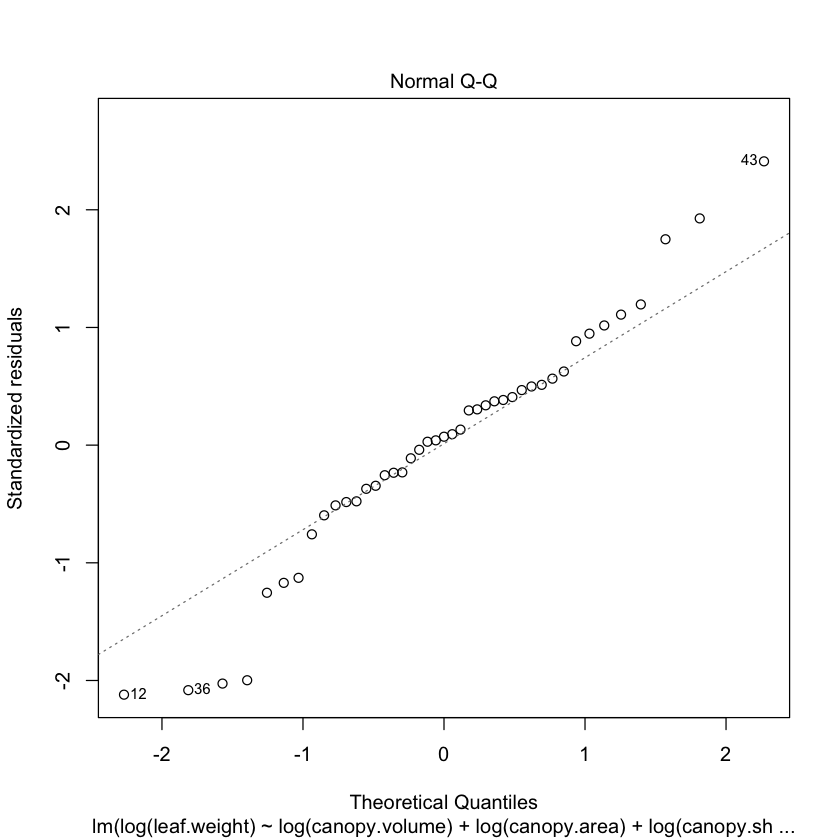

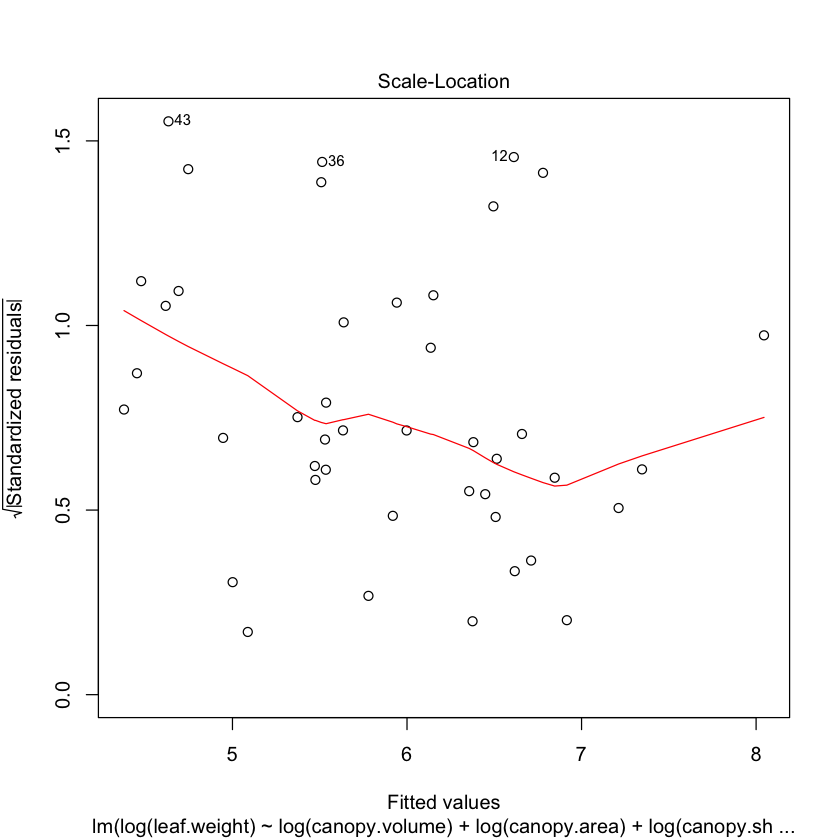

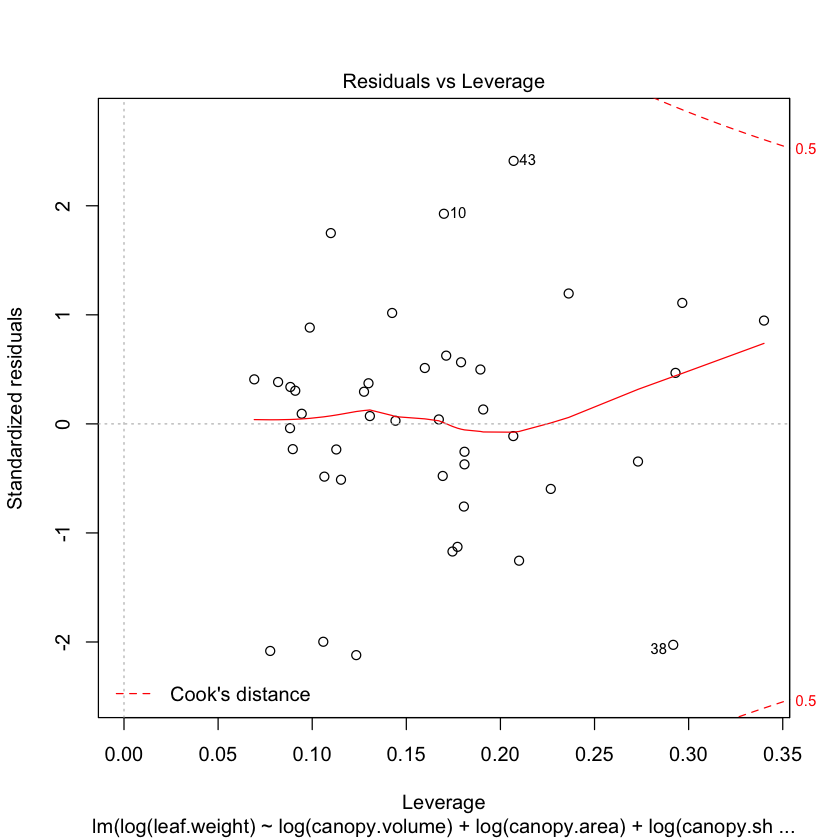

In [16]:
plot(lmFinal)

# Interactions

## Example 0:

In [19]:
M <- 6

n_w <- 1e5
money <- rep(0, n_w)
cents <- rep(0, n_w)

for(i in 1:n_w){
  CS <- sample(c(1, 10, 50, 100), size = M, replace = TRUE)
  money[i] <- sum(CS)
  cents[i] <- length(CS[CS == 1])
}

wallets <- data.frame(cents, money)

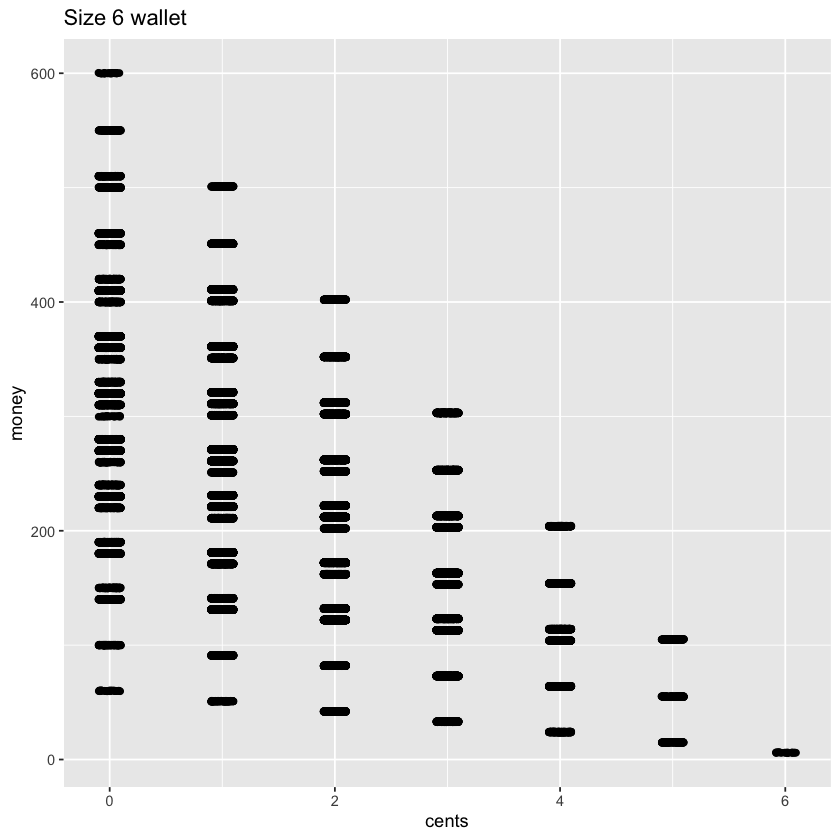

In [21]:
ggplot(wallets, aes(x = cents, y = money)) + geom_jitter(width = 0.1) +
        ggtitle('Size 6 wallet')

## Example 1: Arsenic levels

In [75]:
library(haven)
arsenic <- read.table("C:/Users/Personal/Grupo de Trabajo Stats/ARM_Data/arsenic/wells.dat")
head(arsenic)

switch,arsenic,dist,assoc,educ
1,2.36,16.826,0,0
1,0.71,47.322,0,0
0,2.07,20.967,0,10
1,1.15,21.486,0,12
1,1.10,40.874,1,14
1,3.90,69.518,1,9


In [76]:
names(arsenic)

[1] "switch"  "arsenic" "dist"    "assoc"   "educ"

In [77]:
arsenic.simple <- arsenic %>% mutate(dist100 = dist/100) 

head(arsenic.simple)
dim(arsenic.simple)

switch,arsenic,dist,assoc,educ,dist100
1,2.36,16.826,0,0,0.16826
1,0.71,47.322,0,0,0.47322
0,2.07,20.967,0,10,0.20967
1,1.15,21.486,0,12,0.21486
1,1.10,40.874,1,14,0.40874
1,3.90,69.518,1,9,0.69518


[1] 3020    6

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


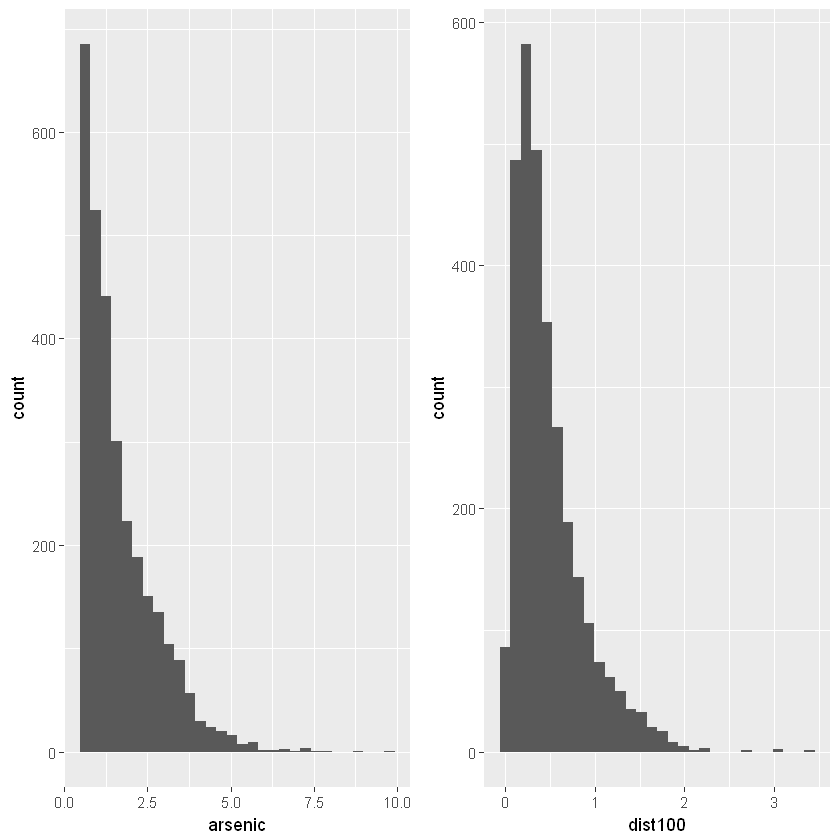

In [79]:
p1 <- ggplot(arsenic.simple, aes(arsenic)) + geom_histogram()
p2 <- ggplot(arsenic.simple, aes(dist100)) + geom_histogram()

multiplot(p1, p2, cols=2)

In [80]:
fit1 <- glm(switch ~ dist, family=binomial(link='logit'), data = arsenic.simple)
fit1


Call:  glm(formula = switch ~ dist, family = binomial(link = "logit"), 
    data = arsenic.simple)

Coefficients:
(Intercept)         dist  
   0.605959    -0.006219  

Degrees of Freedom: 3019 Total (i.e. Null);  3018 Residual
Null Deviance:	    4118 
Residual Deviance: 4076 	AIC: 4080

In [81]:
# https://stackoverflow.com/questions/37329074/geom-smooth-and-exponential-fits
new.data <- arsenic.simple %>% select(dist)
pred <- as.data.frame(predict.glm(fit1, new.data, type = "link", se =TRUE))

pred$fit <- fit1$family$linkinv(pred$fit)
arsenic.simple <- arsenic.simple %>% mutate(pred1 = pred$fit)
head(arsenic.simple)

switch,arsenic,dist,assoc,educ,dist100,pred1
1,2.36,16.826,0,0,0.16826,0.6227698
1,0.71,47.322,0,0,0.47322,0.5772934
0,2.07,20.967,0,10,0.20967,0.6167011
1,1.15,21.486,0,12,0.21486,0.6159379
1,1.10,40.874,1,14,0.40874,0.5870471
1,3.90,69.518,1,9,0.69518,0.5433011


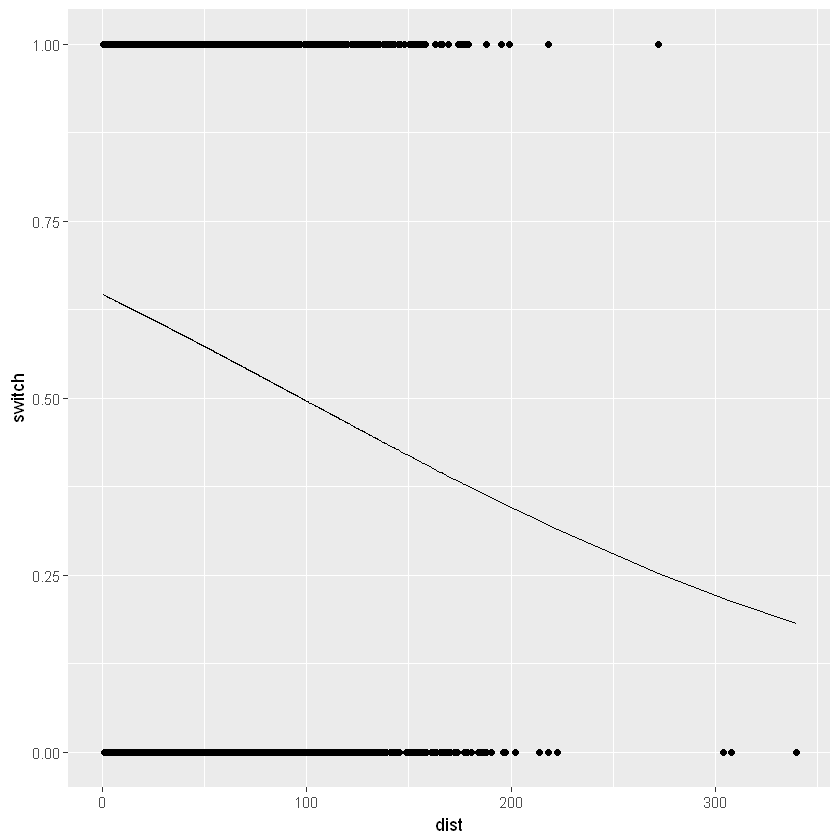

In [82]:
ggplot(arsenic.simple) + geom_point(aes(dist, switch)) + 
    geom_line(aes(dist, pred1))

In [83]:
fit2 <- glm(switch ~ dist100, family=binomial(link='logit'), data = arsenic.simple)
fit2


Call:  glm(formula = switch ~ dist100, family = binomial(link = "logit"), 
    data = arsenic.simple)

Coefficients:
(Intercept)      dist100  
     0.6060      -0.6219  

Degrees of Freedom: 3019 Total (i.e. Null);  3018 Residual
Null Deviance:	    4118 
Residual Deviance: 4076 	AIC: 4080

# Logistic Regression

$$ \Large \log \left( \dfrac{P(X=1)}{1 - P(X=1)} \right) = \beta_0 + \beta_1 X $$

Then, 

$$ \Large P(X=1) = \dfrac{e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}} $$

So when $X = 0$, the probability of changing the well is



In [84]:
b_0 = fit2$coefficients[[1]]
b_1 = fit2$coefficients[[2]]

# proba of changing when well is at 0 meters. 
exp(b_0)/(1+exp(b_0))

[1] 0.6470185

In [85]:
new.data <- arsenic.simple %>% select(dist100)
pred <- as.data.frame(predict.glm(fit2, new.data, type = "link", se =TRUE))

pred$fit <- fit2$family$linkinv(pred$fit)
arsenic.simple <- arsenic.simple %>% mutate(pred2 = pred$fit)
head(arsenic.simple)


switch,arsenic,dist,assoc,educ,dist100,pred1,pred2
1,2.36,16.826,0,0,0.16826,0.6227698,0.6227698
1,0.71,47.322,0,0,0.47322,0.5772934,0.5772934
0,2.07,20.967,0,10,0.20967,0.6167011,0.6167011
1,1.15,21.486,0,12,0.21486,0.6159379,0.6159379
1,1.10,40.874,1,14,0.40874,0.5870471,0.5870471
1,3.90,69.518,1,9,0.69518,0.5433011,0.5433011


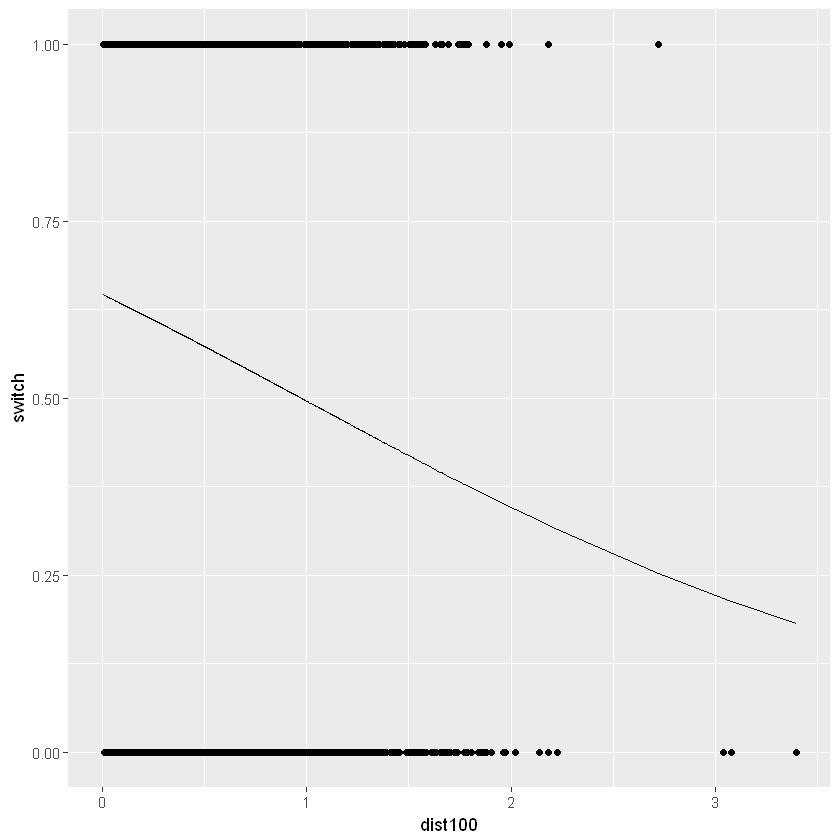

In [86]:
ggplot(arsenic.simple) + geom_point(aes(dist100, switch)) + 
    geom_line(aes(dist100, pred2)) 

In [96]:
fit3 <- glm (switch ~ dist100 + arsenic + dist100:arsenic, family=binomial(link="logit"), data=arsenic.simple)
fit3


Call:  glm(formula = switch ~ dist100 + arsenic + dist100:arsenic, family = binomial(link = "logit"), 
    data = arsenic.simple)

Coefficients:
    (Intercept)          dist100          arsenic  dist100:arsenic  
        -0.1479          -0.5772           0.5560          -0.1789  

Degrees of Freedom: 3019 Total (i.e. Null);  3016 Residual
Null Deviance:	    4118 
Residual Deviance: 3928 	AIC: 3936

In [89]:
arsenic.simple <- arsenic.simple %>% 
    mutate(c.dist100 = dist100 - mean(dist100), c.arsenic = arsenic - mean(arsenic, na.rm = T))

In [156]:
fit4 <- glm (switch ~ dist100 + arsenic + dist100:arsenic, family=binomial(link="logit"), data=arsenic.simple)
fit4


Call:  glm(formula = switch ~ dist100 + arsenic + dist100:arsenic, family = binomial(link = "logit"), 
    data = arsenic.simple)

Coefficients:
    (Intercept)          dist100          arsenic  dist100:arsenic  
        -0.1479          -0.5772           0.5560          -0.1789  

Degrees of Freedom: 3019 Total (i.e. Null);  3016 Residual
Null Deviance:	    4118 
Residual Deviance: 3928 	AIC: 3936

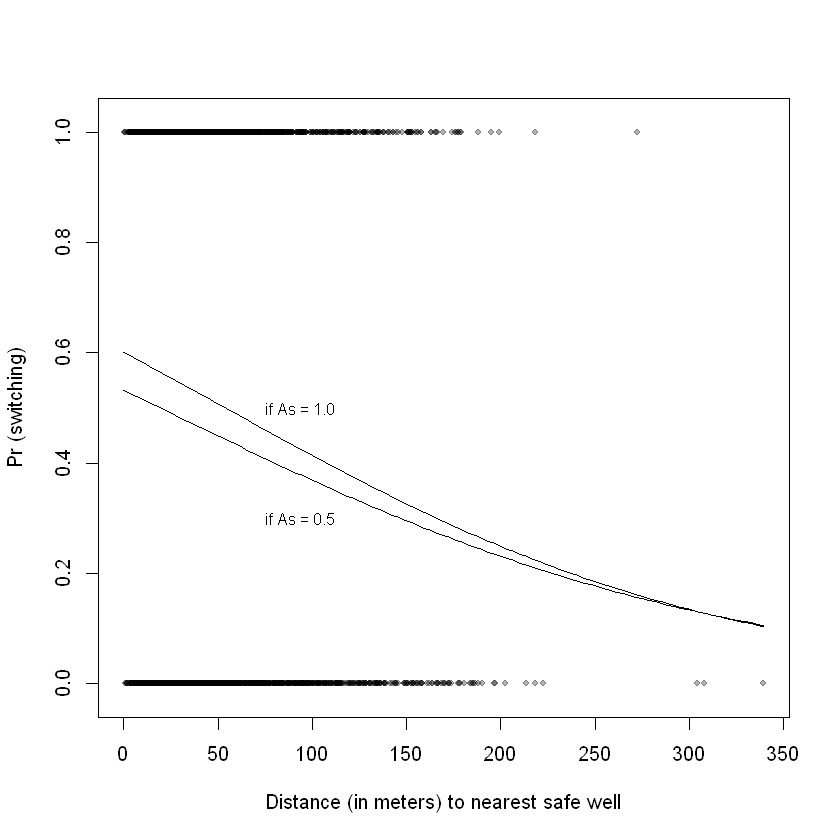

In [185]:
plot(arsenic$dist, arsenic$switch, xlim=c(0,max(arsenic$dist)), ylim=c(-0.02, max(arsenic$switch)+0.02), 
     xlab="Distance (in meters) to nearest safe well", ylab="Pr (switching)", pch=20, col = alpha("black", 0.3))

curve(invlogit(coef(fit4)[1]+coef(fit4)[2]*x/100+coef(fit4)[3]*.50+coef(fit4)[4]*x/100*.50), lwd=.5, add=TRUE)
curve(invlogit(coef(fit4)[1]+coef(fit4)[2]*x/100+coef(fit4)[3]*1+coef(fit4)[4]*x/100*1), lwd=.5, add=TRUE)

text (75, .30, "if As = 0.5", adj=0, cex=.8)
text (75, .50, "if As = 1.0", adj=0, cex=.8)

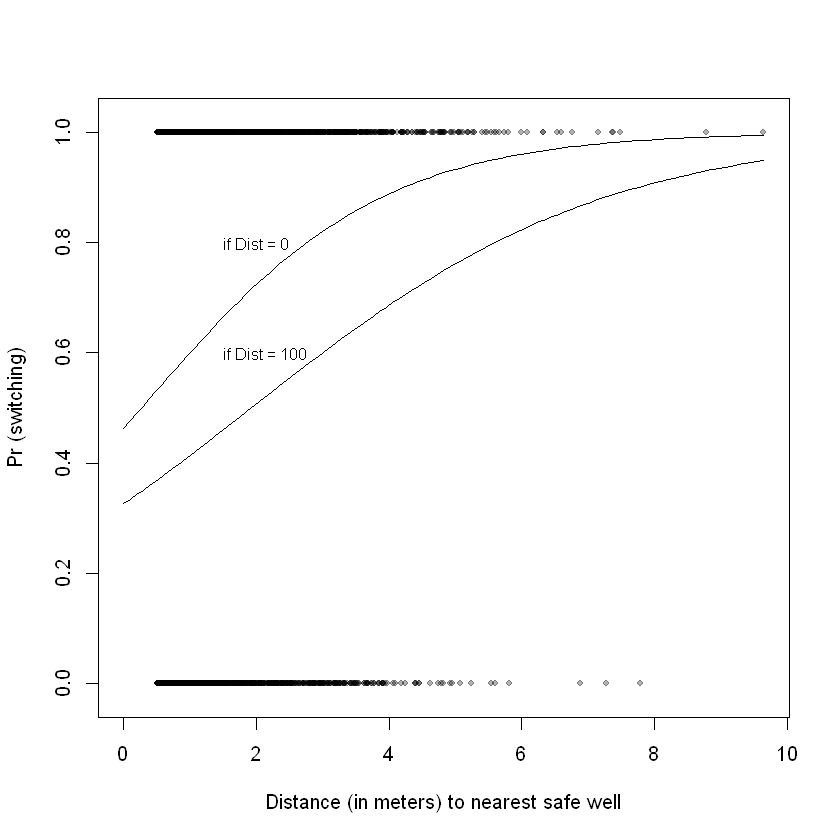

In [177]:
plot(arsenic$arsenic, arsenic$switch, xlim=c(0,max(arsenic$arsenic)), ylim=c(-0.02, max(arsenic$switch)+0.02), 
     xlab="Distance (in meters) to nearest safe well", ylab="Pr (switching)", pch=20, col = alpha("black", 0.3))

curve(invlogit(coef(fit4)[1]+coef(fit4)[2]*0+coef(fit4)[3]*x+coef(fit4)[4]*x*0), lwd=.5, add=TRUE)
curve(invlogit(coef(fit4)[1]+coef(fit4)[2]*1+coef(fit4)[3]*x+coef(fit4)[4]*x*1), lwd=.5, add=TRUE)

text (1.5, .8, "if Dist = 0", adj=0, cex=.8)
text (1.5, .6, "if Dist = 100", adj=0, cex=.8)

In [159]:
fit5 <- glm (switch ~ dist100 + log(arsenic) + dist100:log(arsenic), family=binomial(link="logit"), data=arsenic.simple)
fit5


Call:  glm(formula = switch ~ dist100 + log(arsenic) + dist100:log(arsenic), 
    family = binomial(link = "logit"), data = arsenic.simple)

Coefficients:
         (Intercept)               dist100          log(arsenic)  
              0.4913               -0.8735                0.9834  
dist100:log(arsenic)  
             -0.2309  

Degrees of Freedom: 3019 Total (i.e. Null);  3016 Residual
Null Deviance:	    4118 
Residual Deviance: 3897 	AIC: 3905

Warning message in log(x):
"Se han producido NaNs"Warning message in log(x):
"Se han producido NaNs"Warning message in log(x):
"Se han producido NaNs"Warning message in log(x):
"Se han producido NaNs"

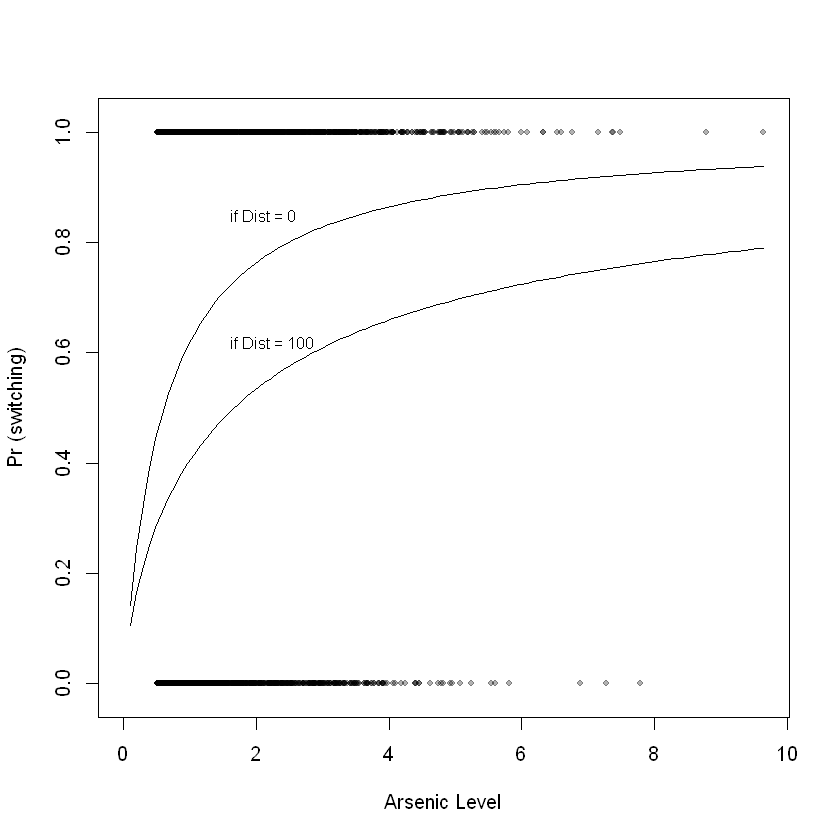

In [180]:
plot(arsenic$arsenic, arsenic$switch, xlim=c(0,max(arsenic$arsenic)), ylim=c(-0.02, max(arsenic$switch)+0.02), 
     xlab="Arsenic Level", ylab="Pr (switching)", pch=20, col = alpha("black", 0.3))

curve(invlogit(coef(fit5)[1]+coef(fit5)[2]*0+coef(fit5)[3]*log(x)+coef(fit5)[4]*log(x)*0), lwd=.5, add=TRUE)
curve(invlogit(coef(fit5)[1]+coef(fit5)[2]*1+coef(fit5)[3]*log(x)+coef(fit5)[4]*log(x)*1), lwd=.5, add=TRUE)

text (1.6, .85, "if Dist = 0", adj=0, cex=.8)
text (1.6, .62, "if Dist = 100", adj=0, cex=.8)

## Example 2: Child iq

In [41]:
child.iq <- read_dta("C:/Users/Personal/Grupo de Trabajo Stats/ARM_Data/child.iq/kidiq.dta")
names(child.iq) <- c("kid.score", "mom.hs", "mom.iq", "mom.work", "mom.age")
head(child.iq)

kid.score,mom.hs,mom.iq,mom.work,mom.age
65,1,121.11753,4,27
98,1,89.36188,4,25
85,1,115.44316,4,27
83,1,99.44964,3,25
115,1,92.74571,4,27
98,0,107.90184,1,18


In [42]:
lm(formula = kid.score ~ mom.hs + mom.iq + mom.hs:mom.iq, data = child.iq)


Call:
lm(formula = kid.score ~ mom.hs + mom.iq + mom.hs:mom.iq, data = child.iq)

Coefficients:
  (Intercept)         mom.hs         mom.iq  mom.hs:mom.iq  
     -11.4820        51.2682         0.9689        -0.4843  


In [125]:
child.iq <- child.iq %>% mutate(c.mom.hs = mom.hs - mean(mom.hs), c.mom.iq = mom.iq - mean(mom.iq))
head(child.iq)

kid.score,mom.hs,mom.iq,mom.work,mom.age,c.mom.hs,c.mom.iq,pred3
65,1,121.11753,4,27,0.2142857,21.1175286,98.48152
98,1,89.36188,4,25,0.2142857,-10.6381183,83.09227
85,1,115.44316,4,27,0.2142857,15.4431649,95.73164
83,1,99.44964,3,25,0.2142857,-0.5503606,87.98094
115,1,92.74571,4,27,0.2142857,-7.2542900,84.73212
98,0,107.90184,1,18,-0.7857143,7.9018378,93.06291


In [126]:
lm(formula = kid.score ~ c.mom.hs + c.mom.iq + c.mom.hs:c.mom.iq, data = child.iq)


Call:
lm(formula = kid.score ~ c.mom.hs + c.mom.iq + c.mom.hs:c.mom.iq, 
    data = child.iq)

Coefficients:
      (Intercept)           c.mom.hs           c.mom.iq  c.mom.hs:c.mom.iq  
          87.6389             2.8408             0.5884            -0.4843  


In [52]:
fit.3 <- lm(formula = kid.score ~ c.mom.hs + c.mom.iq + c.mom.hs:c.mom.iq, data = child.iq)
new.data <- child.iq %>% select(c.mom.hs, c.mom.iq)
pred <- predict.lm(fit.3, new.data)

child.iq <- child.iq %>% mutate(pred3 = pred)
#ggplot(child.iq) + geom_point(aes(c.mom.iq, kid.score)) + geom_line(aes(c.mom.iq, pred3))

# Interactions

Among average iq moms, going to hs increases child score. 

The interaction coeff: given that a mother went to hs, the higher the iq, the higher child.score is. 


<img src = 'mesquiteMeasure.jpg'>

In [8]:
# Multiple plot function
#
# ggplot objects can be passed in ..., or to plotlist (as a list of ggplot objects)
# - cols:   Number of columns in layout
# - layout: A matrix specifying the layout. If present, 'cols' is ignored.
#
# If the layout is something like matrix(c(1,2,3,3), nrow=2, byrow=TRUE),
# then plot 1 will go in the upper left, 2 will go in the upper right, and
# 3 will go all the way across the bottom.
#
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}